In [1]:
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import pandas as pd
import numpy as np
import patsy
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')

In [2]:
dataset = pd.read_csv('pokemon.csv')

In [3]:
dataset.head()

,#,Name,Type,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
#Odstránime nepotrebné údaje
del dataset['#']
del dataset['Type2']
del dataset['Total']

In [5]:
dataset.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [6]:
#Zoradíme si dataset podľa kategórií
dataset = dataset.sort_values(by=['Type'])
dataset.head()

,Name,Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
600,Sewaddle,Bug,45,53,70,40,60,42,5,False
136,Pinsir,Bug,65,125,100,55,70,85,1,False
457,Burmy,Bug,40,29,45,29,45,36,4,False
132,Scyther,Bug,70,110,80,55,80,105,1,False
656,Joltik,Bug,50,47,50,57,50,65,5,False


In [7]:
#Názvy kategórii sme premenili na čisla a uložili do nového stĺpca
lastrow = dataset.loc[0]
count = 0
for index, row in dataset.iterrows():
    if row['Type'] != lastrow['Type']:
        count += 1  
    dataset.at[index, 'Category'] = float(count)
    if row['Legendary'] == True:
        dataset.at[index, 'Legendary'] = float(1)
    else:
        dataset.at[index, 'Legendary'] = float(0)
    lastrow = row

dataset.head(15)

,Name,Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Category
600,Sewaddle,Bug,45,53,70,40,60,42,5,False,1.0
136,Pinsir,Bug,65,125,100,55,70,85,1,False,1.0
457,Burmy,Bug,40,29,45,29,45,36,4,False,1.0
132,Scyther,Bug,70,110,80,55,80,105,1,False,1.0
656,Joltik,Bug,50,47,50,57,50,65,5,False,1.0
657,Galvantula,Bug,70,77,60,97,60,108,5,False,1.0
288,Wurmple,Bug,45,45,35,20,30,20,3,False,1.0
289,Silcoon,Bug,50,35,55,25,25,15,3,False,1.0
677,Shelmet,Bug,50,40,85,40,65,25,5,False,1.0
232,HeracrossMega Heracross,Bug,80,185,115,40,105,75,2,False,1.0


In [8]:
corrMatrix = dataset.corr(method = 'pearson')
corrMatrix
#Pôvodný plán bol naučiť NS predikciu kategórie pokémona na základe jeho štatistík,
#avšak môžeme vidieť, že neeixstuje korelácia medzi štatistikami a kategóriou

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Category
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620,0.094230
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408,-0.037525
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377,0.103439
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907,-0.006694
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937,0.018911
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715,-0.066471
Generation,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794,-0.101129
Legendary,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000,-0.010162
Category,0.094230,-0.037525,0.103439,-0.006694,0.018911,-0.066471,-0.101129,-0.010162,1.000000


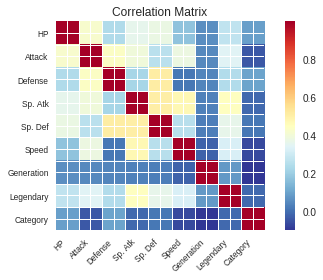

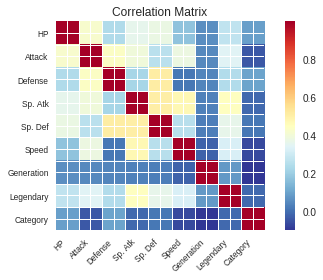

In [9]:
plot_corr(corrMatrix, xnames=corrMatrix.columns, ynames=corrMatrix.columns,\
          title=None, normcolor=False, cmap='RdYlBu_r')